In [1]:
!pip install tensorflow==2.0.0-beta0

     |████████████████████████████████| 87.9MB 34kB/s 
     |████████████████████████████████| 3.1MB 49.9MB/s 
     |████████████████████████████████| 501kB 52.4MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
import zipfile
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import io
tf.__version__

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

'2.0.0-beta0'

In [0]:
# local_zip = '/content/drive/My Drive/AI content/datasets/intel image classification/intel-image-classification.zip'
# zip_ref = zipfile.ZipFile(local_zip,'r')
# zip_ref.extractall('/content/drive/My Drive/AI content/datasets/intel image classification/Data')
# zip_ref.close()

In [3]:
train_path = '/content/drive/My Drive/AI content/datasets/intel image classification/Data/seg_train/seg_train'
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode  ='binary'
                                                    )

Found 14034 images belonging to 6 classes.


In [4]:
train_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (150,150,3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(6,activation = 'softmax')
])
model.compile(optimizer = "adam", 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

In [156]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 248838    
Total params: 253,926
Trainable params: 253,926
Non-trainable params: 0
________________________________________________

In [0]:
model.load_weights("/content/drive/My Drive/AI content/datasets/intel image classification/Data/model.h5")
history1 = []
for i in range(10):
  history  = model.fit_generator(train_generator,epochs = 10,verbose = 1)
  history1.append(history)
  model.save_weights("/content/drive/My Drive/AI content/datasets/intel image classification/Data/model2.h5")
  



In [8]:
len(os.listdir(train_path+'/buildings'))

2191

[[0. 0. 0. 0. 0. 0.]]


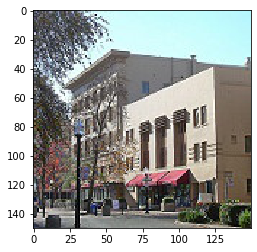

In [159]:

rand_path = train_path+'/buildings/'+os.listdir(train_path+'/buildings')[np.random.randint(2000)]
img = image.load_img(rand_path, target_size=(150, 150))
x = image.img_to_array(img)
plt.imshow(img)
x = np.expand_dims(x, axis=0)
print((model2.predict(x)))


In [13]:
actual_ans = model.predict(x/255)[0][5]
temp = np.zeros((150,150,3))
increase_values = []
Z = np.copy(x/255)
for i in range(150):
  print(i)
  for j in range(150):
    for k in range(3):
      Z[0][i][j][k] += 0.1
      temp_ans = model.predict(Z)[0][5]-actual_ans
      temp[i][j][k] = temp_ans
      Z[0][i][j][k] -= 0.1



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


5
[[3.2234375e-15 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00]]
0
[[1. 0. 0. 0. 0. 0.]]


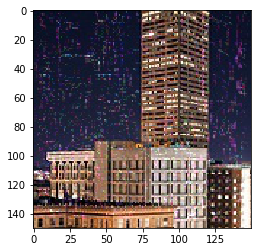

In [0]:

# cv2_imshow(temp*10**3)
y  = np.copy(x[0])
y+=temp2*10**5.9

# print(y[0][0][:])
y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB)
# print(y[0][0][:])
cv2.imwrite('color_img.jpg', y)
img  = image.load_img('color_img.jpg', target_size=(150, 150))
plt.imshow(img)
y = np.expand_dims(y,axis = 0)
print(np.argmax(model.predict(y)))
print(model.predict(y))
print(np.argmax(model.predict(x)))
print(model2.predict(x))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


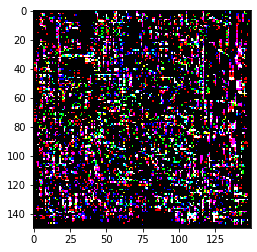

In [47]:
plt.imshow(temp2*10**7)

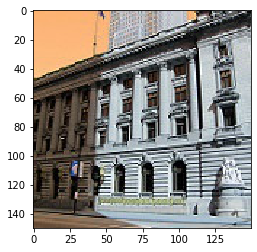

In [0]:
cv2.imwrite('color_img.jpg', x)
img  = image.load_img('color_img.jpg', target_size=(150, 150))
plt.imshow(img)

In [0]:
flatted = np.reshape(temp,(1,67500))
sorted_index = np.argsort(flatted)
temp2 = np.zeros((150,150,3))
top = 100

for i in range(10000):
  index = sorted_index[0][-i-1]
  a1 = index//450
  index = index % 450
  a2 = index // 3
  a3 = index % 3
  temp2[a1][a2][a3] = temp[a1][a2][a3]



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


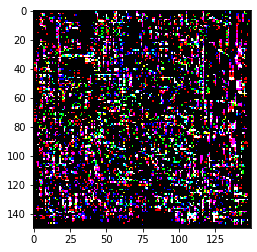

In [0]:
plt.imshow(temp2*10**7)

5
[[3.2234375e-15 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00]]
0
[[1. 0. 0. 0. 0. 0.]]


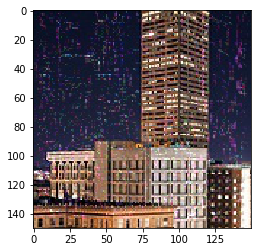

In [0]:

# cv2_imshow(temp*10**3)
y  = np.copy(x[0])
y+=temp2*10**5.9

# print(y[0][0][:])
y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB)
# print(y[0][0][:])
cv2.imwrite('color_img.jpg', y)
img  = image.load_img('color_img.jpg', target_size=(150, 150))
plt.imshow(img)
y = np.expand_dims(y,axis = 0)
print(np.argmax(model.predict(y)))
print(model.predict(y))
print(np.argmax(model.predict(x)))
print(model2.predict(x))

In [0]:
import io

out_v = io.open('answers.txt', 'w', encoding='utf-8')
for i in range(150):
  for j in range(150):
    for k in range(3):
      out_v.write(str(temp[i][j][k])+" ")
out_v.close()

In [0]:
tempo = np.zeros((150,150,3))
with open('answers.txt') as f:
    for line in f:
        values = line.split();
        l = 0
        for i in range(150):
          for j in range(150):
            for k in range(3):
              tempo[i][j][k]= float(values[l])
              l+=1
              
        

In [16]:
pwd

'/content'

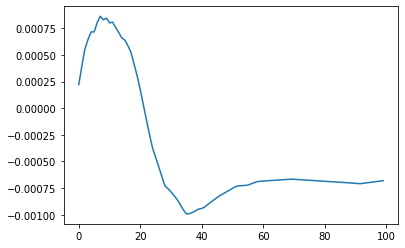

In [153]:
inc = np.zeros((1,100))
q = np.random.randint(0,149)
w = np.random.randint(0,149)
r = np.random.randint(0,2)
y = np.copy(test)
y[0][q][w][r] = 0
ans = model2.predict(y)[0][5]
for i  in range(100):
  y[0][q][w][r]+=.1
  t = model2.predict(y)[0][5]
  inc[0][i] = t-ans
x = np.arange(100)
y = inc
plt.plot(x,y[0])

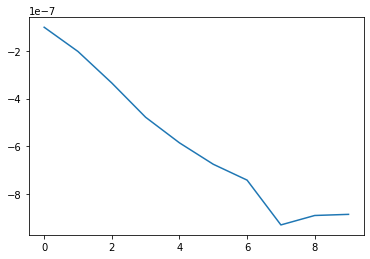

[[4.0999189e-04 1.6608425e-04 1.5463696e-01 5.2848536e-01 3.1601191e-01
  2.8964505e-04]]


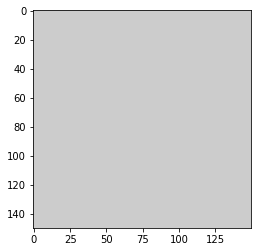

In [68]:
test = np.zeros((150,150,3))
test+=.8
plt.imshow(test)
test = np.expand_dims(test,axis = 0)
print(model.predict(test))